# Part 1: Simple Linear Regression

## Understanding Simple Linear Regression
First, we'll perform a simple linear regression using statsmodels. We'll use a synthetic dataset for illustration.

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Independent variable
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2  # Dependent variable with some noise

# Adding constant for intercept in model
X_sm = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_sm).fit()


In [ ]:
# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     810.4
Date:                Tue, 07 May 2024   Prob (F-statistic):           3.49e-49
Time:                        08:38:46   Log-Likelihood:                -210.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      98   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4443      0.387      3.736      0.0

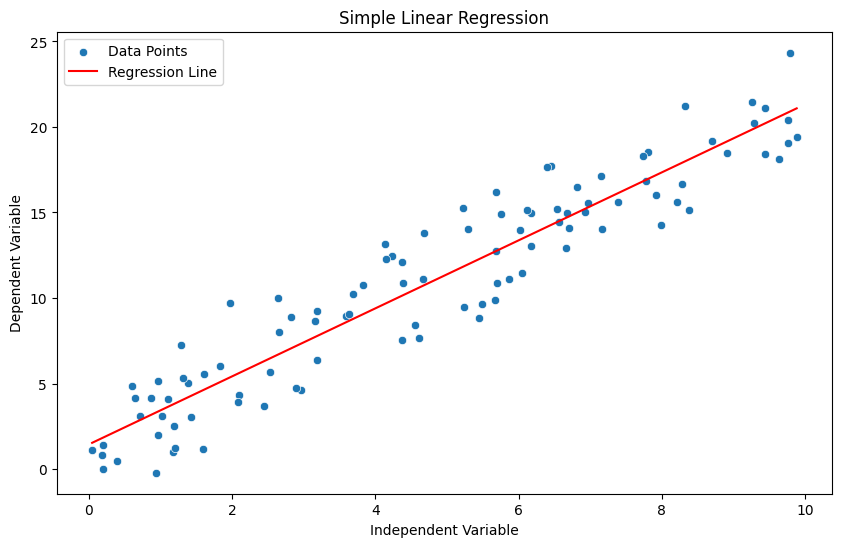

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.squeeze(), y=y, label='Data Points')
sns.lineplot(x=X.squeeze(), y=model.predict(X_sm), color='red', label='Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [ ]:
!gdown --id 1C5Z4X6T-6j-OIUyifd0WEal_kSTLheGF

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1C5Z4X6T-6j-OIUyifd0WEal_kSTLheGF
To: /content/USA_Housing.csv
100% 726k/726k [00:00<00:00, 126MB/s]


In [ ]:
df = pd.read_csv('/content/USA_Housing.csv')

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df = df.drop('Address', axis = 1)

In [ ]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [ ]:
import statsmodels.api as sm

y = df['Price'].values
X = df['Avg. Area Income'].values

X_sm = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_sm).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     3463.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        08:38:48   Log-Likelihood:                -69651.
No. Observations:                5000   AIC:                         1.393e+05
Df Residuals:                    4998   BIC:                         1.393e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.216e+05    2.5e+04     -8.863      0.0

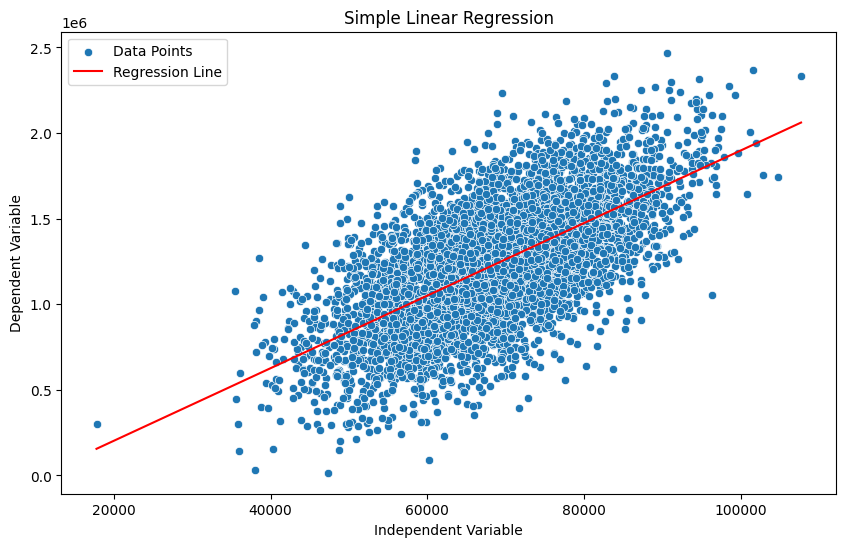

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, label='Data Points')
sns.lineplot(x=X, y=model.predict(X_sm), color='red', label='Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

## Evaluating Model Fit
The R-squared value is provided in the model summary from statsmodels. Additionally, we can generate residual plots:


In [ ]:
residuals = model.resid

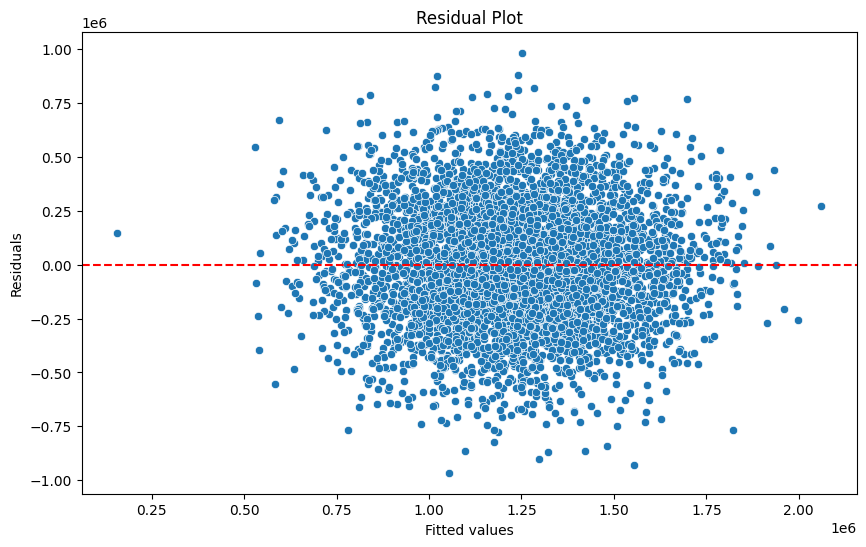

In [ ]:
# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.predict(X_sm), y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# Part 2: Multiple Linear Regression

## Introduction to Multiple Linear Regression
Let's extend to multiple linear regression with a synthetic dataset.

In [ ]:
X2 = df[['Avg. Area Income','Avg. Area House Age']].values
X_multi_sm = sm.add_constant(X2)

# Fit model
model_multi = sm.OLS(y, X_multi_sm).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     3995.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        08:38:49   Log-Likelihood:                -68579.
No. Observations:                5000   AIC:                         1.372e+05
Df Residuals:                    4997   BIC:                         1.372e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.19e+06   2.75e+04    -43.225      0.0

## Diagnosing Multicollinearity
We calculate the Variance Inflation Factor (VIF) for each independent variable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_multi_sm, i) for i in range(X_multi_sm.shape[1])]
print("VIF for each variable:", vif)


VIF for each variable: [78.9251356920704, 1.0000040273685364, 1.000004027368536]


# Part 3: Model Validation and Assumption Testing

## Cross-Validation
We use scikit-learn for k-fold cross-validation.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Convert to scikit-learn's format
model_sk = LinearRegression()
scores = cross_val_score(model_sk, X_multi, y, cv=5)
print("Cross-validation scores:", scores)


## Checking Regression Assumptions
We visually inspect assumptions using plots for the multiple linear regression model:

In [ ]:
# Linearity and Homoscedasticity via Residuals vs. Fitted plot
# Normality of Residuals via Q-Q plot
# Independence is assumed in time series via Durbin-Watson statistic in summary

# Fitting model using scikit-learn for simplicity in plotting
model_sk.fit(X_multi, y)
fitted_values = model_sk.predict(X_multi)
residuals = y - fitted_values


In [ ]:
# Q-Q plot for normality
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title('Q-Q plot')


In [ ]:
# Residuals vs Fitted for homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# Part 4: Simple Linear Regression and Hypothesis Testing

In linear regression, hypothesis testing is commonly used to determine if there is a statistically significant relationship between the independent variable(s) and the dependent variable. Specifically, we test hypotheses about the regression coefficients (β) obtained in the model. Here's how it's generally structured:

Null Hypothesis (H0): There is no relationship between the independent and dependent variables. In mathematical terms, this means the coefficient (β) equals 0 (β=0).

Alternative Hypothesis (H1): There is a relationship between the independent and dependent variables, implying the coefficient (β) is not equal to 0 (β=0).

Let's use a simple linear regression model as an example to illustrate hypothesis testing. We'll generate synthetic data, fit a linear regression model using statsmodels, and then interpret the hypothesis test results for the regression coefficient.

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  # Dependent variable with some noise

# Add constant for intercept
X_sm = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_sm).fit()

# Display model summary
print(model.summary())

# Plot regression line and data points
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label='Data Points')
plt.plot(X, model.predict(X_sm), 'r', label='Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.show()


### Interpreting Hypothesis Test Results for Coefficients
In the model summary output by statsmodels, you'll find a section for each coefficient (β) including:

* Coefficient value: Estimate of β.
* Std Err: Standard error of the coefficient estimate.
* t: t-statistic for the hypothesis test.
* P>|t|: p-value associated with the hypothesis test.

How to Interpret:
* P-value < 0.05: Typically, if the p-value is less than 0.05, we reject the null hypothesis (H0) in favor of the alternative hypothesis (H1), indicating a statistically significant relationship between the independent variable and the dependent variable at the 5% significance level.

* P-value ≥ 0.05: If the p-value is greater than or equal to 0.05, we do not reject the null hypothesis, suggesting that the evidence is not strong enough to conclude there is a statistically significant relationship.

# Part 5: Real World Application

# Load Dataset

In [ ]:
!gdown --id 1Qk5FZxfA_jhDcxI3YmuEIbVgd8ZeldMn

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/BMI Calculation_MJH.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand its structure
df.head()

In [ ]:
import statsmodels.api as sm

# Correcting the column name for the independent variable
X = df[['Hieght (cm)']]  # Independent variable
y = df['BMI (Before COVID)']  # Dependent variable

# Add a constant to the independent variable to include the intercept in the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


The regression analysis results provide several key pieces of information about the relationship between height (in cm) and BMI before COVID:

- **Regression Coefficient for Hieght (cm):** The coefficient is -0.0537, with a p-value less than 0.05 (p < 0.000), indicating that the relationship between height and BMI before COVID is statistically significant. For every one-centimeter increase in height, the BMI before COVID decreases by approximately 0.0537 units, holding all other factors constant.

- **Intercept (const):** The intercept is 31.6293, indicating the expected value of BMI before COVID when height is 0 cm, which is not a realistic scenario but is a part of how the regression equation is structured.

- **R-squared:** The R-squared value is 0.015, suggesting that approximately 1.5% of the variability in BMI before COVID is explained by height. This indicates a very weak explanatory power of height on BMI in this model.

- **Model Significance:** The F-statistic is 25.05 with a p-value of 6.20e-07, indicating that the model is statistically significant overall.

**Interpretation:**
The significant p-value for the height coefficient suggests a statistically significant relationship between height and BMI before COVID. However, the negative coefficient indicates an inverse relationship, and the low R-squared value suggests that height alone does not strongly predict BMI before COVID, implying that other factors not included in this model may also play a significant role in determining BMI.

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Hieght (cm)'], y=y, label='Data Points')
sns.lineplot(x=df['Hieght (cm)'], y=model.predict(X), color='red', label='Regression Line')
plt.xlabel('Height (cm)')
plt.ylabel('BMI (Before COVID)')
plt.title('Simple Linear Regression: Height vs. BMI Before COVID')
plt.legend()
plt.show()
